In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from scipy import stats
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import grangercausalitytests
import pickle

import cdt
import networkx as nx

c:\Users\Anton\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Detecting 1 CUDA device(s).


In [2]:
df = pd.read_csv("./df_aaple.csv")
df = df.iloc[:,1:5]
df

,Close,Adj. Close,P/E (LTM),EPS - Est High (NTM)
0,27.905,17.580627,35.994469,1.0800
1,27.960,17.615278,36.065413,1.0800
2,28.195,17.763332,36.368538,1.0800
3,28.485,17.946037,36.742607,1.0800
4,28.135,17.725531,36.291144,1.0800
...,...,...,...,...
4249,151.230,148.094575,28.533935,5.9759
4250,152.030,148.877988,28.684879,5.9759
4251,152.320,149.161976,28.739596,5.9759
4252,151.380,148.241465,28.562237,5.9759


In [3]:
df_aapl = pd.read_csv("df_aaple.csv")
df_small = df_aapl.iloc[:,:4]
df_small.drop(columns="Adj. Close", inplace=True)
df_small["P/E"] = df_small["P/E (LTM)"]
df_small.drop(columns="P/E (LTM)", inplace=True)
df_small["# Buys"] = df_aapl["# Buys"]
df = df_small.iloc[:,1:]

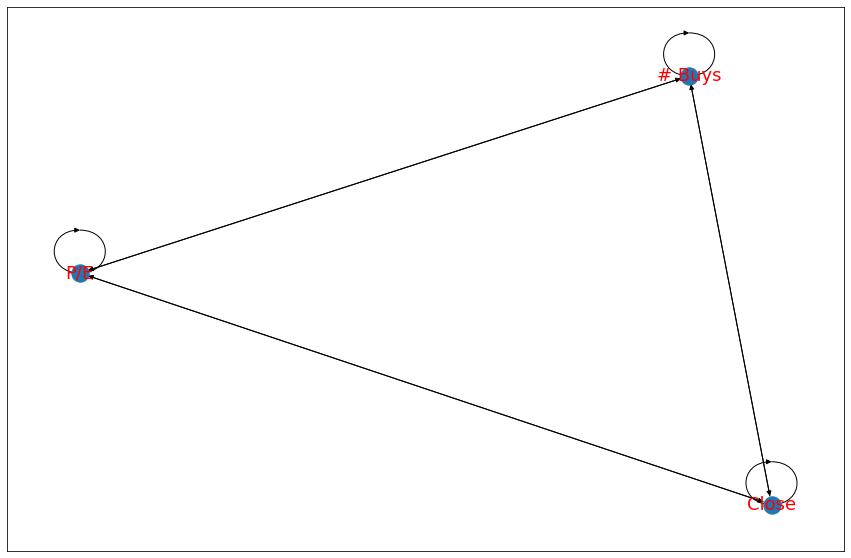

In [11]:
# Get skeleton graph
# initialize graph lasso
glasso = cdt.independence.graph.Glasso()
# apply graph lasso to data
skeleton = glasso.predict(df)
# visualize network
fig = plt.figure(figsize=(15,10))
nx.draw_networkx(skeleton, font_size=18, font_color='r')

In [22]:
cdt.SETTINGS.rpath = 'C:\Program Files\R\R-4.0.3\bin\x64\R.exe' # path to your r executable


In [24]:
# GES algorithm
model_ges = cdt.causality.graph.GES()
# graph_ges = model_ges.predict(df, skeleton)

# # visualize network
# fig=plt.figure(figsize=(15,10))
# nx.draw_networkx(graph_ges, font_size=18, font_color='r')

R Call errored, is R available ?


FileNotFoundError: [WinError 2] The system cannot find the file specified